In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('autos_dataset.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
symboling,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
normalized-losses,?,?,?,164,164,?,158,?,158,?,...,74,103,74,103,74,95,95,95,95,95
make,alfa-romero,alfa-romero,alfa-romero,audi,audi,audi,audi,audi,audi,audi,...,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo
fuel-type,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo,...,std,std,std,turbo,turbo,std,turbo,std,turbo,turbo
num-of-doors,two,two,two,four,four,two,four,four,four,two,...,four,four,four,four,four,four,four,four,four,four
body-style,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,...,wagon,sedan,wagon,sedan,wagon,sedan,sedan,sedan,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,...,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd
engine-location,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
df.replace({'?':np.nan},inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
len(df.columns)

26

In [7]:
(df.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [8]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [9]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [10]:
df.drop(['num-of-doors','make','fuel-type','aspiration','body-style', 'drive-wheels', 'engine-location','engine-type','fuel-system'],axis=1,inplace=True)

In [11]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
symboling,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
normalized-losses,NaN,NaN,NaN,164,164,NaN,158,NaN,158,NaN,...,74,103,74,103,74,95,95,95,95,95
wheel-base,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1
length,168.8,168.8,171.2,176.6,176.6,177.3,192.7,192.7,192.7,178.2,...,188.8,188.8,188.8,188.8,188.8,188.8,188.8,188.8,188.8,188.8
width,64.1,64.1,65.5,66.2,66.4,66.3,71.4,71.4,71.4,67.9,...,67.2,67.2,67.2,67.2,67.2,68.9,68.8,68.9,68.9,68.9
height,48.8,48.8,52.4,54.3,54.3,53.1,55.7,55.7,55.9,52.0,...,57.5,56.2,57.5,56.2,57.5,55.5,55.5,55.5,55.5,55.5
curb-weight,2548,2548,2823,2337,2824,2507,2844,2954,3086,3053,...,3034,2935,3042,3045,3157,2952,3049,3012,3217,3062
num-of-cylinders,four,four,six,four,five,five,five,five,five,five,...,four,four,four,four,four,four,four,six,six,four
engine-size,130,130,152,109,136,136,136,136,131,131,...,141,141,141,130,130,141,141,173,145,141
bore,3.47,3.47,2.68,3.19,3.19,3.19,3.19,3.19,3.13,3.13,...,3.78,3.78,3.78,3.62,3.62,3.78,3.78,3.58,3.01,3.78


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    int64  
 7   num-of-cylinders   205 non-null    object 
 8   engine-size        205 non-null    int64  
 9   bore               201 non-null    object 
 10  stroke             201 non-null    object 
 11  compression-ratio  205 non-null    float64
 12  horsepower         203 non-null    object 
 13  peak-rpm           203 non-null    object 
 14  city-mpg           205 non-null    int64  
 15  highway-mpg        205 non-null    int64  
 16  price              201 non

In [13]:
df.fillna(df.median(),inplace=True)

In [14]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
symboling,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
normalized-losses,115.0,115.0,115.0,164,164,115.0,158,115.0,158,115.0,...,74,103,74,103,74,95,95,95,95,95
wheel-base,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1
length,168.8,168.8,171.2,176.6,176.6,177.3,192.7,192.7,192.7,178.2,...,188.8,188.8,188.8,188.8,188.8,188.8,188.8,188.8,188.8,188.8
width,64.1,64.1,65.5,66.2,66.4,66.3,71.4,71.4,71.4,67.9,...,67.2,67.2,67.2,67.2,67.2,68.9,68.8,68.9,68.9,68.9
height,48.8,48.8,52.4,54.3,54.3,53.1,55.7,55.7,55.9,52.0,...,57.5,56.2,57.5,56.2,57.5,55.5,55.5,55.5,55.5,55.5
curb-weight,2548,2548,2823,2337,2824,2507,2844,2954,3086,3053,...,3034,2935,3042,3045,3157,2952,3049,3012,3217,3062
num-of-cylinders,four,four,six,four,five,five,five,five,five,five,...,four,four,four,four,four,four,four,six,six,four
engine-size,130,130,152,109,136,136,136,136,131,131,...,141,141,141,130,130,141,141,173,145,141
bore,3.47,3.47,2.68,3.19,3.19,3.19,3.19,3.19,3.13,3.13,...,3.78,3.78,3.78,3.62,3.62,3.78,3.78,3.58,3.01,3.78


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    int64  
 7   num-of-cylinders   205 non-null    object 
 8   engine-size        205 non-null    int64  
 9   bore               205 non-null    object 
 10  stroke             205 non-null    object 
 11  compression-ratio  205 non-null    float64
 12  horsepower         205 non-null    object 
 13  peak-rpm           205 non-null    object 
 14  city-mpg           205 non-null    int64  
 15  highway-mpg        205 non-null    int64  
 16  price              205 non

In [16]:
df['bore']=df['bore'].astype(float)
df['normalized-losses']=df['normalized-losses'].astype(float)
df['stroke']=df['stroke'].astype(float)
df['horsepower']=df['horsepower'].astype(float)
df['peak-rpm']=df['peak-rpm'].astype(float)
df['price']=df['price'].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    int64  
 7   num-of-cylinders   205 non-null    object 
 8   engine-size        205 non-null    int64  
 9   bore               205 non-null    float64
 10  stroke             205 non-null    float64
 11  compression-ratio  205 non-null    float64
 12  horsepower         205 non-null    float64
 13  peak-rpm           205 non-null    float64
 14  city-mpg           205 non-null    int64  
 15  highway-mpg        205 non-null    int64  
 16  price              205 non

In [18]:
df['num-of-cylinders'].nunique()

7

In [19]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [20]:
df1=df.copy()
df2=df.copy()
df3=df.copy()
df4=df.copy()

### Simplest Encoding: replacing the distinct values of the columns with relevant numbers

In [21]:
df1['num-of-cylinders'].replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8},inplace=True)

In [22]:
df1['num-of-cylinders'].dtype

dtype('int64')

In [23]:
df1

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [24]:
df1.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.457484,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.132563,-0.004928,-0.178515,0.071064,0.273851,-0.035823,0.034606,-0.080149
normalized-losses,0.457484,1.000000,-0.073709,-0.006837,0.058378,-0.365674,0.064343,0.075319,0.072536,-0.050428,0.046739,-0.114772,0.166964,0.241134,-0.189530,-0.149357,0.095489
wheel-base,-0.531954,-0.073709,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.489556,0.159684,0.249786,0.352876,-0.361338,-0.470414,-0.544082,0.584847
length,-0.357612,-0.006837,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.607016,0.128622,0.158414,0.553337,-0.286362,-0.670909,-0.704662,0.686567
width,-0.232919,0.058378,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559262,0.182708,0.181129,0.641337,-0.219374,-0.642704,-0.677218,0.724558
height,-0.541038,-0.365674,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.173506,-0.058994,0.261214,-0.109286,-0.321113,-0.048640,-0.107358,0.140439
curb-weight,-0.227691,0.064343,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648848,0.168164,0.151362,0.750927,-0.266358,-0.757414,-0.797465,0.819817
num-of-cylinders,-0.113129,0.075319,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.234576,0.003389,-0.020002,0.691832,-0.124883,-0.445837,-0.466666,0.681036
engine-size,-0.105790,0.072536,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.585636,0.200246,0.028971,0.810216,-0.244383,-0.653658,-0.677470,0.860343
bore,-0.132563,-0.050428,0.489556,0.607016,0.559262,0.173506,0.648848,0.234576,0.585636,1.000000,-0.056054,0.005468,0.574258,-0.256600,-0.582627,-0.585352,0.532861


In [25]:
df1.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

<AxesSubplot:xlabel='curb-weight', ylabel='price'>

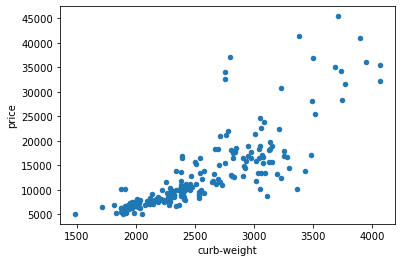

In [26]:
df1.plot(x='curb-weight',y='price',kind='scatter')

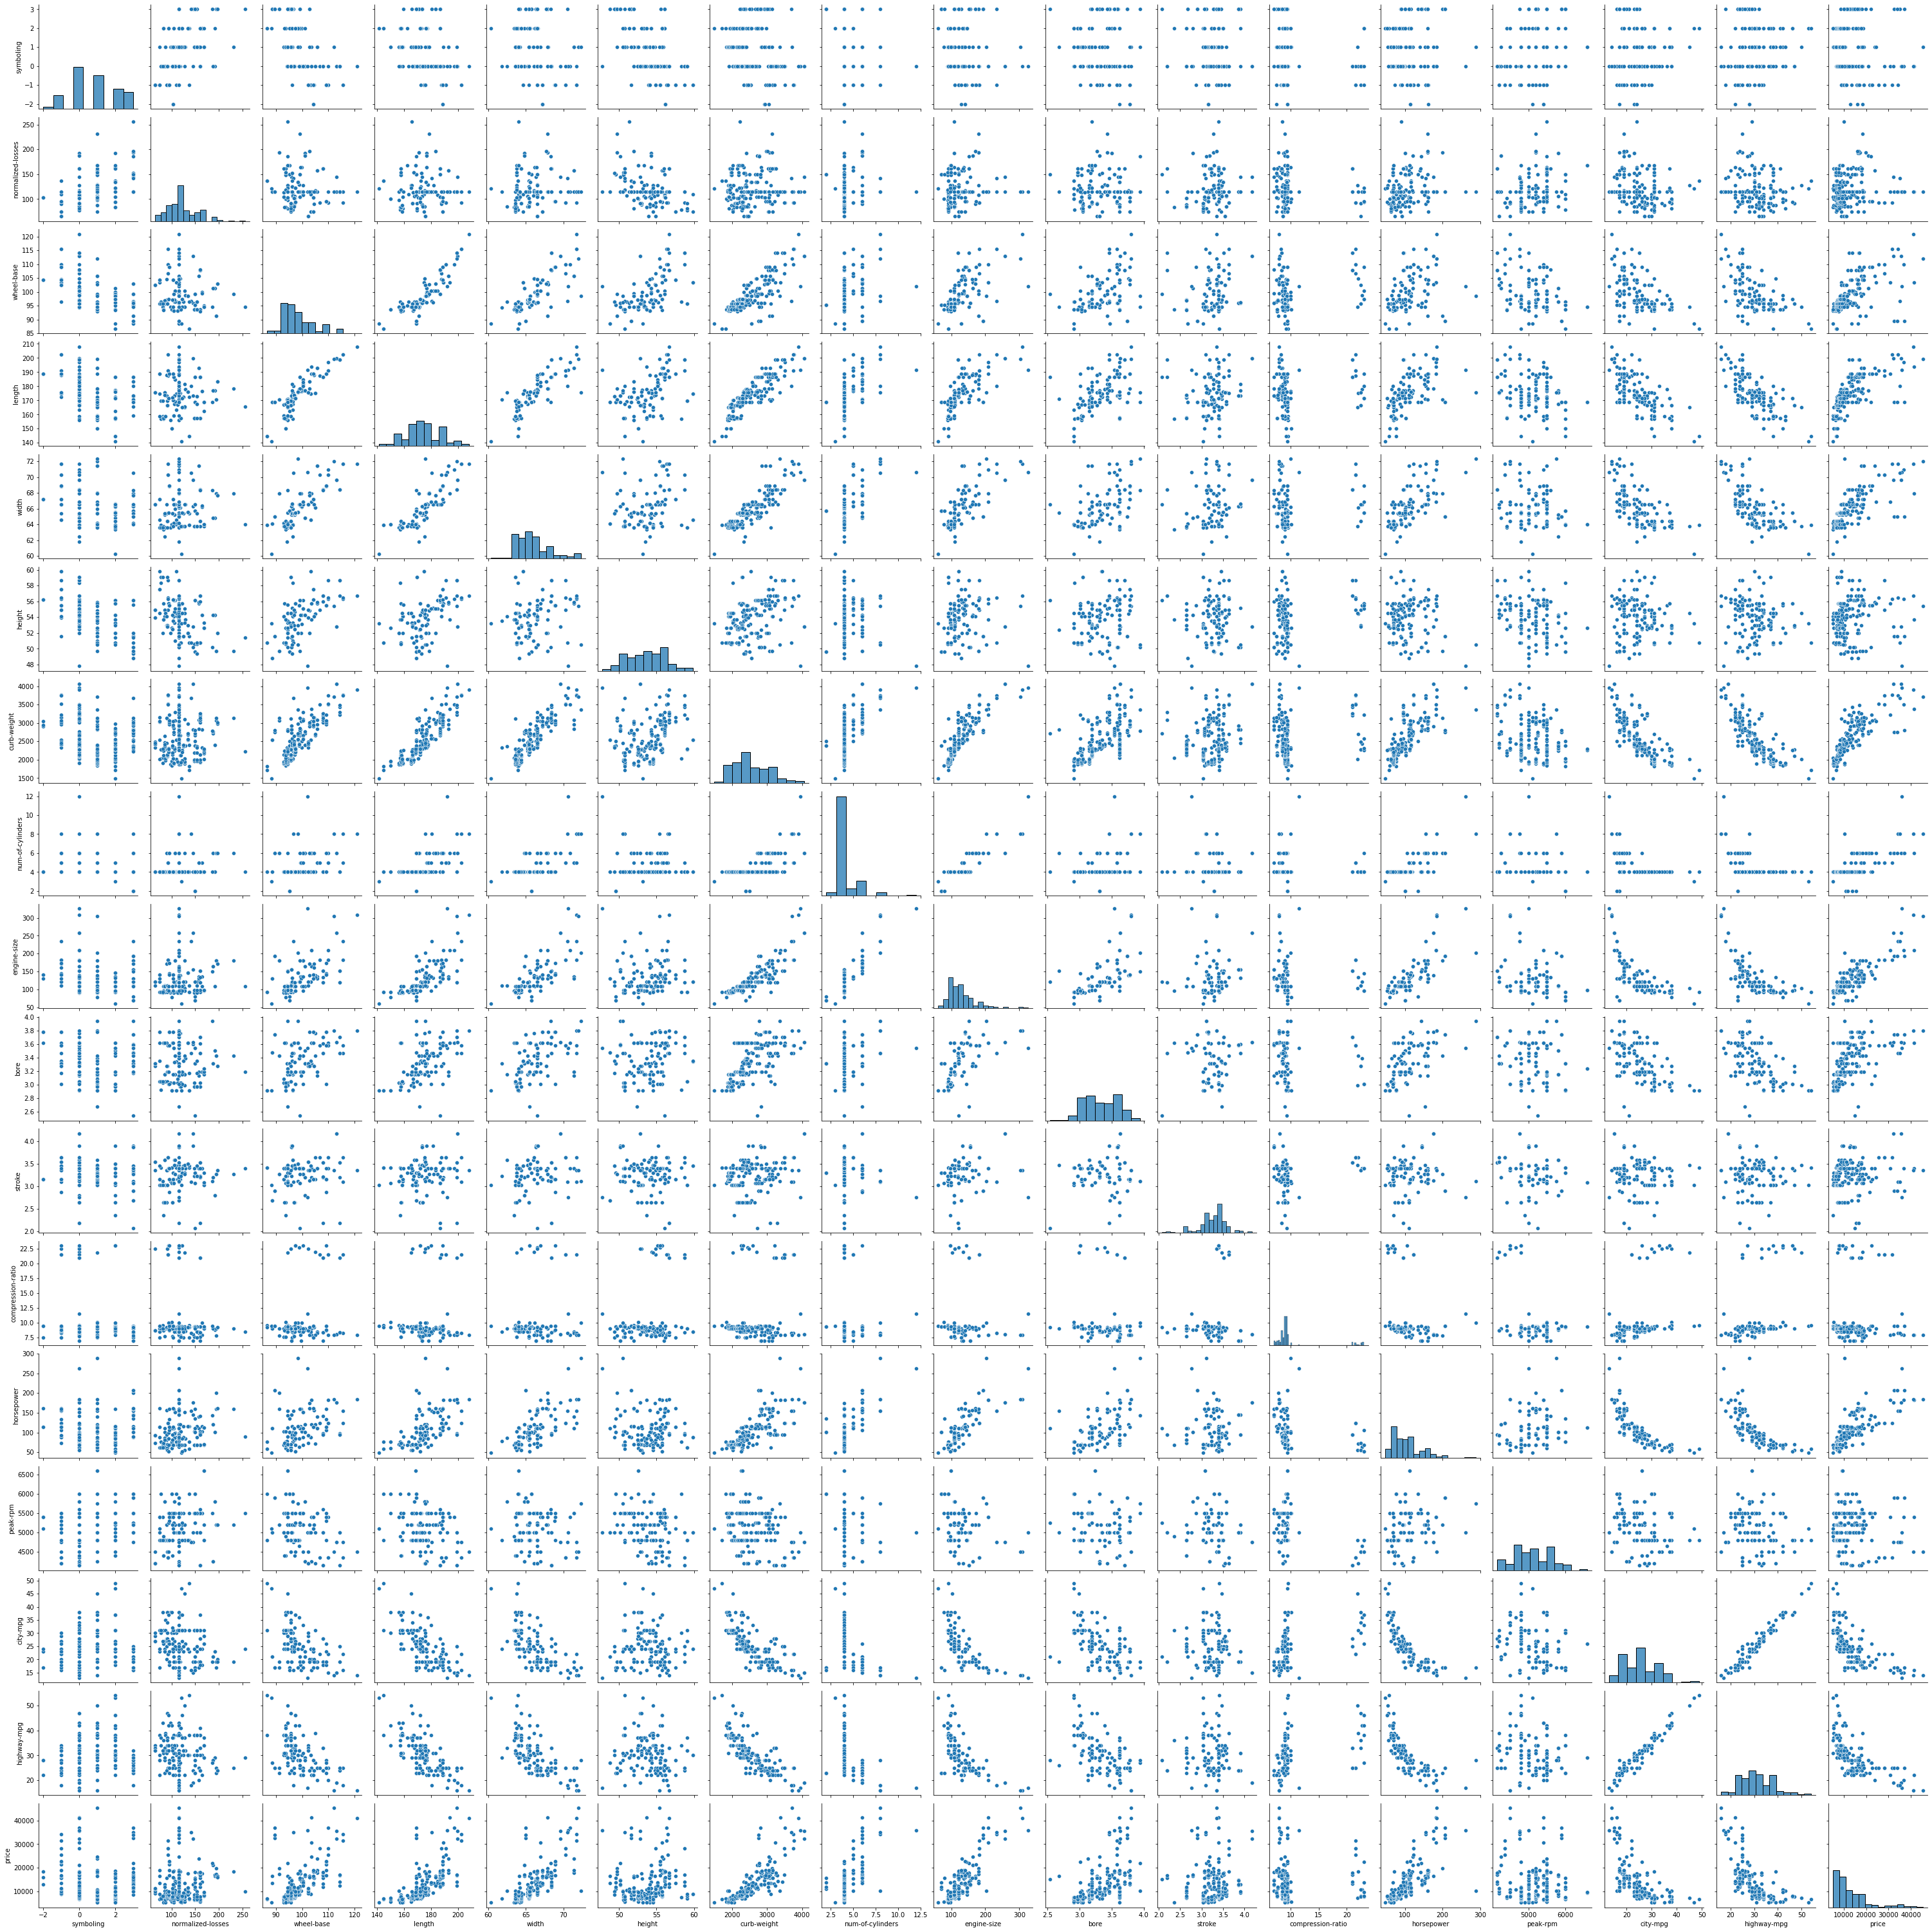

In [28]:
import seaborn as sns
sns.pairplot(df1)

<AxesSubplot:>

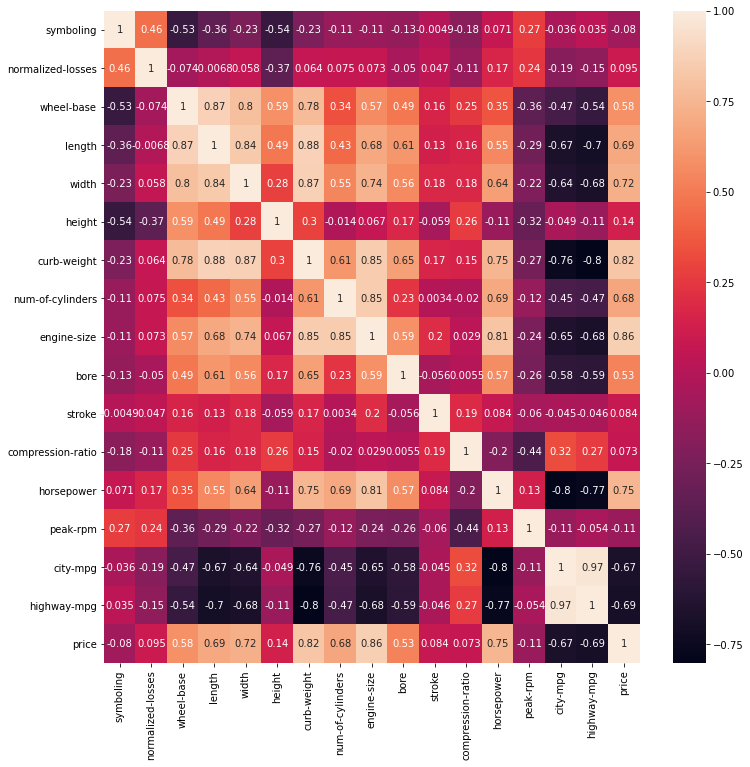

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(),annot=True)

In [69]:
df1

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,four,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,109.1,188.8,68.8,55.5,3049,four,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,109.1,188.8,68.9,55.5,3012,six,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,109.1,188.8,68.9,55.5,3217,six,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [34]:
y=df1['price']
x=df1.drop('price',axis='columns')

In [75]:
x

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,115.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,115.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,115.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114.0,5400.0,23,28
201,-1,95.0,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160.0,5300.0,19,25
202,-1,95.0,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134.0,5500.0,18,23
203,-1,95.0,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106.0,4800.0,26,27


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=1)

In [36]:
linear_model=LinearRegression()

In [37]:
linear_model.fit(x_train,y_train)

LinearRegression()

### Residual

```residual = y_actual - y_predicted```

```residuals = sum (y_actual - y_predicted)```

In [38]:

y_pred=linear_model.predict(x_test)


In [40]:
residual= y_test - y_pred
residual

78     -498.165621
97     2260.023953
151      14.703477
44     4873.331767
40     1236.579679
67     -297.125689
98     2339.782424
18     5887.530713
152      76.939160
62     -576.240228
4      2095.403299
172    3453.562718
197    -301.543120
38    -1654.545566
29    -2815.206679
170   -2988.581755
190     777.077323
33    -2833.803069
136    3882.527329
145    1722.813950
173       5.698816
31    -1644.627659
11     5086.155753
119    -549.886358
169   -4269.784420
34    -2224.902736
84    -1681.155026
184   -1477.245946
120    -159.980563
35    -1541.176169
163    2060.774572
Name: price, dtype: float64

In [41]:
np.mean(residual),np.median(residual)

(330.9333654585065, -159.98056290418026)

### Kernel Density plot

<AxesSubplot:xlabel='price', ylabel='Density'>

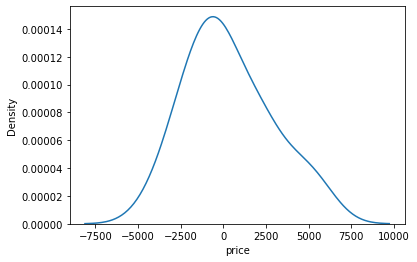

In [42]:
sns.kdeplot(residual)

### Shapiro Test

In [43]:
from scipy.stats import shapiro, normaltest, kstest

In [45]:
test_statastics,p_value = shapiro(residual)
print('p value is', p_value)

if p_value > 0.05:
    print('Data is normally distibuted')
else:
    print('DATA IS NOT NORMALLY DISTRIBUTED')

p value is 0.35784009099006653
Data is noramlly distibuted


### Normality test

In [46]:
test_statastics,p_value = normaltest(residual,)
print('p value is', p_value)

if p_value > 0.05:
    print('Data is noramlly distibuted')
else:
    print('DATA IS NOT NORMALLY DISTRIBUTED')

p value is 0.47340107161341927
Data is noramlly distibuted


### KStest

##### need to check about the hypothesis testing.

In [54]:
_,p_value = kstest(residual,'norm',mode={'approx'})
print('p value is', p_value)

if p_value > 0.05:
    print('Data is noramlly distibuted')
else:
    print('DATA IS NOT NORMALLY DISTRIBUTED')

p value is 3.372474647763268e-08
Data is noramlly distibuted


In [ ]:
## this is how we check is distribution is uniform or not! we are not checking the condition of noramlity here.
_,p_value = kstest(residual,'uniform',mode={'approx'})
print('p value is', p_value)

if p_value > 0.05:
    print('Data is noramlly distibuted')
else:
    print('DATA IS NOT NORMALLY DISTRIBUTED')

In [60]:
from scipy import stats
import statsmodels.api as sm

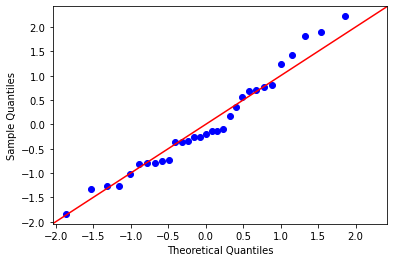

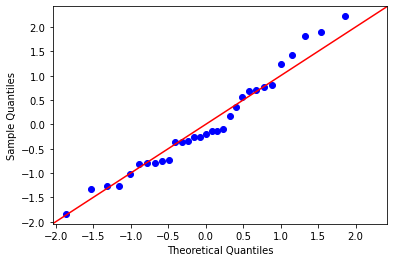

In [62]:
sm.qqplot(residual, line='45', dist= stats.norm, fit=True)

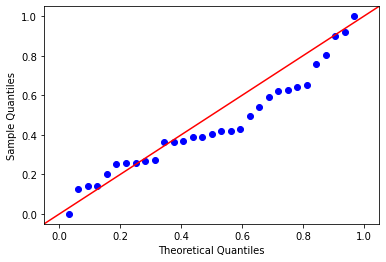

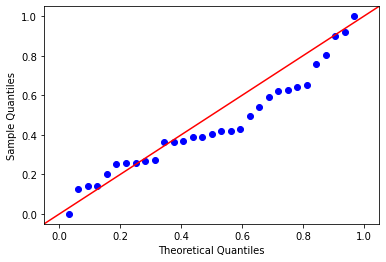

In [65]:
## this is how we check is distribution is uniform or not! we are not checking the condition of noramlity here.
sm.qqplot(residual, line='45', dist= stats.uniform, fit=True)

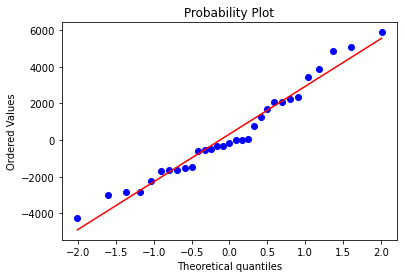

In [64]:
stats.probplot(residual, dist = 'norm', plot=plt)
plt.show()

In [ ]:
Ways we check the assumptions of LR:
    1. scatterplot, pairplot
    2. df.corr()
    3. sns.heatmap
    4. checking mean, median values
    5. kernel desity plot
    6. statastical analysis
        a. shapiro test
        b. normal test
        c. kstest
    7. QQ plot

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("mse is", mean_squared_error(y_test,y_pred))
print('r2 score is', r2_score(y_test,y_pred))